In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import datetime as dt
from datetime import datetime
import random

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import lightgbm as ltb
from sklearn.metrics import accuracy_score
from scipy.stats import truncnorm
from pandas.core.groupby.groupby import T

from sklearn.metrics import roc_curve,roc_auc_score,RocCurveDisplay,accuracy_score
from typing import List
from dataclasses import dataclass
from datetime import datetime
import datetime as dt

import matplotlib as plts
import seaborn as sns
from sklearn.utils import shuffle
from typing import List
from dataclasses import dataclass

In [ ]:
## Read tasks dataset
xls = pd.ExcelFile('/content/drive/MyDrive/tasks_dataset.xlsx')

df1 = pd.read_excel(xls, 'test_1 (old)').dropna()
df2 = pd.read_excel(xls, 'test_2').dropna()
df3 = pd.read_excel(xls, 'test_3').dropna()
df4 = pd.read_excel(xls, 'test_4').dropna()
df5 = pd.read_excel(xls, 'test_5').dropna()
df6 = pd.read_excel(xls, 'test_6').dropna()
df7 = pd.read_excel(xls, 'test_7').dropna()
df8 = pd.read_excel(xls, 'test_8').dropna()
df9 = pd.read_excel(xls, 'test_9').dropna()
df10 = pd.read_excel(xls, 'test_10').dropna()

## Join dataset into one dataframe
data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], axis=0, ignore_index=True)

#print(data)

In [ ]:
# Instantiate the KMeans models
km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
print(data.iloc[:, 4:6])

# Fit the KMeans model
data["cluster"] = km.fit_predict(data.iloc[:, 4:6])
print(data["cluster"])

     dropoff_x_loc  dropoff_y_loc
0      7175.861970   11216.661972
1       691.488384   12941.819302
2     14329.756671    6138.844200
3      5467.100887   12553.441782
4       557.931457   11503.557787
..             ...            ...
995    4999.583917    4594.280152
996      85.364664    7773.304258
997   11572.719540    1209.407803
998   14329.756671    6138.844200
999     691.488384   12941.819302

[1000 rows x 2 columns]
0      2
1      2
2      3
3      2
4      2
      ..
995    1
996    2
997    3
998    3
999    2
Name: cluster, Length: 1000, dtype: int32


In [ ]:
# Calculate Silhoutte Score
#score = silhouette_score(data, km.labels_, metric='euclidean')

# Print the score
#print('Silhouetter Score: %.3f' % score)

In [ ]:
#data.describe()

In [ ]:
## The following pie chart represents the percentage of priority levels distribution of the dataset tasks
## dropoff speed limit column represents tasks priority level (60 normal, 80 priority, 100 urgent)
pie = data["dropoff_speed_limit"].value_counts()
store = pie.index
orders = pie.values

fig = px.pie(data, values=orders, names=store)
fig.show()

In [ ]:
# Tasks are clustered based on their dropoff location (X,Y)
data.dropna()

x = np.array(data[["dropoff_speed_limit","dropoff_x_loc", "dropoff_y_loc"]])
y = np.array(data[["cluster"]])
print(data[["cluster"]].value_counts())


cluster
2          290
3          260
0          250
1          200
dtype: int64


In [ ]:
## Calculate euclidean distance and Estimated delivery time for each task.
## When benchmarking with collaborative workforce assignment work, distance was calculated as the Manhattan distance

# The following speed are meter per minute
AVAvgSpeed = 1666.66667 ## meter/min == 100 km/hour
GVAvgSpeed = 1166.66667 ## meter/min == 70km/hour

totalEuclideanDistance = 0
avgEuclideanDistance = 0
totalTaskCount = 0

## Generate timestamps for tasks dataset
base = datetime.now()
data = data.sample(frac=1).reset_index(drop=True)

for index, task in data.iterrows():
  totalTaskCount+=1
  #index = task["task_ID"]
  pickupPoint = np.array((task['pickup_x_loc'], task['pickup_y_loc']))
  dropoffPoint = np.array((task['dropoff_x_loc'], task['dropoff_y_loc']))

  euc_distance = np.linalg.norm(dropoffPoint - pickupPoint)
  data.loc[index, 'euclidean_distance'] = euc_distance

  totalEuclideanDistance += euc_distance
  #print(totalEuclideanDistance)
  #print(totalTaskCount)
  data.loc[index, 'AVG_Commulative_Distance'] = totalEuclideanDistance / totalTaskCount

  ## Calculate ETA with AV
  data.loc[index, 'ETA_AV'] = euc_distance / AVAvgSpeed

  ## Calculate ETA with GV, with additional 15% distance to euclidean distance as road constraints.
  data.loc[index, 'ETA_GV'] = (1.15 * euc_distance) / GVAvgSpeed ## Not used

  ## Calculate task submission, expected start and end timestamps for both AV and GV
  ## Change minutes parameter to 0.5, 1, or 2 tasks per minute to simulate performance under different arrival rates
  data.loc[index, 'submission_timestamp'] = base + dt.timedelta(minutes = index/0.5)

  print(base + dt.timedelta(minutes = index/0.5))
  #data.loc[index, 'start_timestamp']  = data.loc[index, 'submission_timestamp'] + dt.timedelta(minutes = 1/6) ## Not used
  #data.loc[index, 'end_timestamp_AV'] = data.loc[index, 'start_timestamp']      + dt.timedelta(minutes = euc_distance / AVAvgSpeed) ## Not used
  #data.loc[index, 'end_timestamp_GV'] = data.loc[index, 'start_timestamp']      + dt.timedelta(minutes = (1.15 * euc_distance) / GVAvgSpeed) ## Not used

## Save preprocessed dataset
data.to_csv("/content/drive/MyDrive/Preprocessed_Tasks.csv", sep=',', index=False, encoding='utf-8')

2024-01-02 11:09:43.105696
2024-01-02 11:11:43.105696
2024-01-02 11:13:43.105696
2024-01-02 11:15:43.105696
2024-01-02 11:17:43.105696
2024-01-02 11:19:43.105696
2024-01-02 11:21:43.105696
2024-01-02 11:23:43.105696
2024-01-02 11:25:43.105696
2024-01-02 11:27:43.105696
2024-01-02 11:29:43.105696
2024-01-02 11:31:43.105696
2024-01-02 11:33:43.105696
2024-01-02 11:35:43.105696
2024-01-02 11:37:43.105696
2024-01-02 11:39:43.105696
2024-01-02 11:41:43.105696
2024-01-02 11:43:43.105696
2024-01-02 11:45:43.105696
2024-01-02 11:47:43.105696
2024-01-02 11:49:43.105696
2024-01-02 11:51:43.105696
2024-01-02 11:53:43.105696
2024-01-02 11:55:43.105696
2024-01-02 11:57:43.105696
2024-01-02 11:59:43.105696
2024-01-02 12:01:43.105696
2024-01-02 12:03:43.105696
2024-01-02 12:05:43.105696
2024-01-02 12:07:43.105696
2024-01-02 12:09:43.105696
2024-01-02 12:11:43.105696
2024-01-02 12:13:43.105696
2024-01-02 12:15:43.105696
2024-01-02 12:17:43.105696
2024-01-02 12:19:43.105696
2024-01-02 12:21:43.105696
2

In [ ]:
# Read Preprocessed Dataset
TasksData = pd.read_csv('/content/drive/MyDrive/Preprocessed_Tasks.csv')

## Predict cluster of tasks based on their dropoff cooridantes
## Select attributes for training
xTasks = np.array(TasksData[["dropoff_speed_limit","dropoff_x_loc", "dropoff_y_loc", "euclidean_distance", "AVG_Commulative_Distance", "ETA_GV", "ETA_AV","min_Rep", "submission_timestamp"]])
## Select target value to predict
yTasks = np.array(TasksData[["cluster"]])

# Split data for training regressor to predict cluster for coming tasks
xtrainClustering, xtestClustering, ytrainClustering, ytestClustering = train_test_split(xTasks[:,1:3], yTasks, test_size=0.25,random_state=42)

In [ ]:
## This function returns the max number of AVs and GVs to be used by each cluster based on the current vehicles availability
def caculateNumberOfWorkers (totalTasksCount, totalGVsCount, totalAVsCount, clusterTaskPercent, urgencyPercentList):

  AV_count = np.rint(clusterTaskPercent * urgencyPercentList[100] * totalAVsCount)
  HV_count = np.rint(clusterTaskPercent * urgencyPercentList[80]  * (totalGVsCount + totalAVsCount))
  GV_count = np.rint(clusterTaskPercent * urgencyPercentList[60]  * totalGVsCount)

  return [AV_count, HV_count, GV_count]

In [ ]:
## This function determines the recommended/expected delivery mode for each task based on current vehicles availability
## and average commulative travelled distance (ACTD) of the task cluster.
def getDeliveryMode(taskInfo, remainingAVs, remainingGVs, taskCountPercent):
  remainingAVsPerCluster = totalAVsCount*taskCountPercent/4
  # Play with this threshold when optimizing task fullfillment by workers during the allocation process
  # when threshold is set to 1, any task requiring a travelling distance larger than the ACTD of the cluster,
  # is assigned to a an AV if one was available within the cluster AV limit.
  threshold = 1
  if taskInfo["euclidean_distance"] > threshold * taskInfo["AVG_Commulative_Distance"] and remainingAVsCount > remainingAVsPerCluster:
    return "AV"
  return "GV"


In [ ]:
## define full dataset, combining tasks atrributes with their cluster and delivery mode columns.
xDF = pd.DataFrame(xTasks, columns = ["urgency", "dropoff_x_loc", "dropoff_y_loc", "euclidean_distance", "AVG_Commulative_Distance", "ETA_GV", "ETA_AV", "min_Rep", "submission_timestamp"])
yDF = pd.DataFrame(ytestClustering, columns = ["cluster"])
dataPred = pd.concat([xDF,yDF], axis=1)
#print(dataPred)

dataPred.insert(0, "deliveryMode", pd.DataFrame([None]*250))

Processing cluster:  0
Total tasks per cluster  66
Cluster task occupancy of the total task count  0.264
AV count: 15.0, GV count: 30.0
Total workers assigned to cluster 0: 45.0
______________________________________________________________
Processing cluster:  1
Total tasks per cluster  48
Cluster task occupancy of the total task count  0.192
AV count: 4.0, GV count: 29.0
Total workers assigned to cluster 1: 33.0
______________________________________________________________
Processing cluster:  2
Total tasks per cluster  76
Cluster task occupancy of the total task count  0.304
AV count: 2.0, GV count: 51.0
Total workers assigned to cluster 2: 53.0
______________________________________________________________
Processing cluster:  3
Total tasks per cluster  60
Cluster task occupancy of the total task count  0.24
AV count: 1.0, GV count: 41.0
Total workers assigned to cluster 3: 42.0
______________________________________________________________


<ipython-input-14-28f518f8ebc8>:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-28f518f8ebc8>:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-28f518f8ebc8>:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-28f518f8ebc8>:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

END


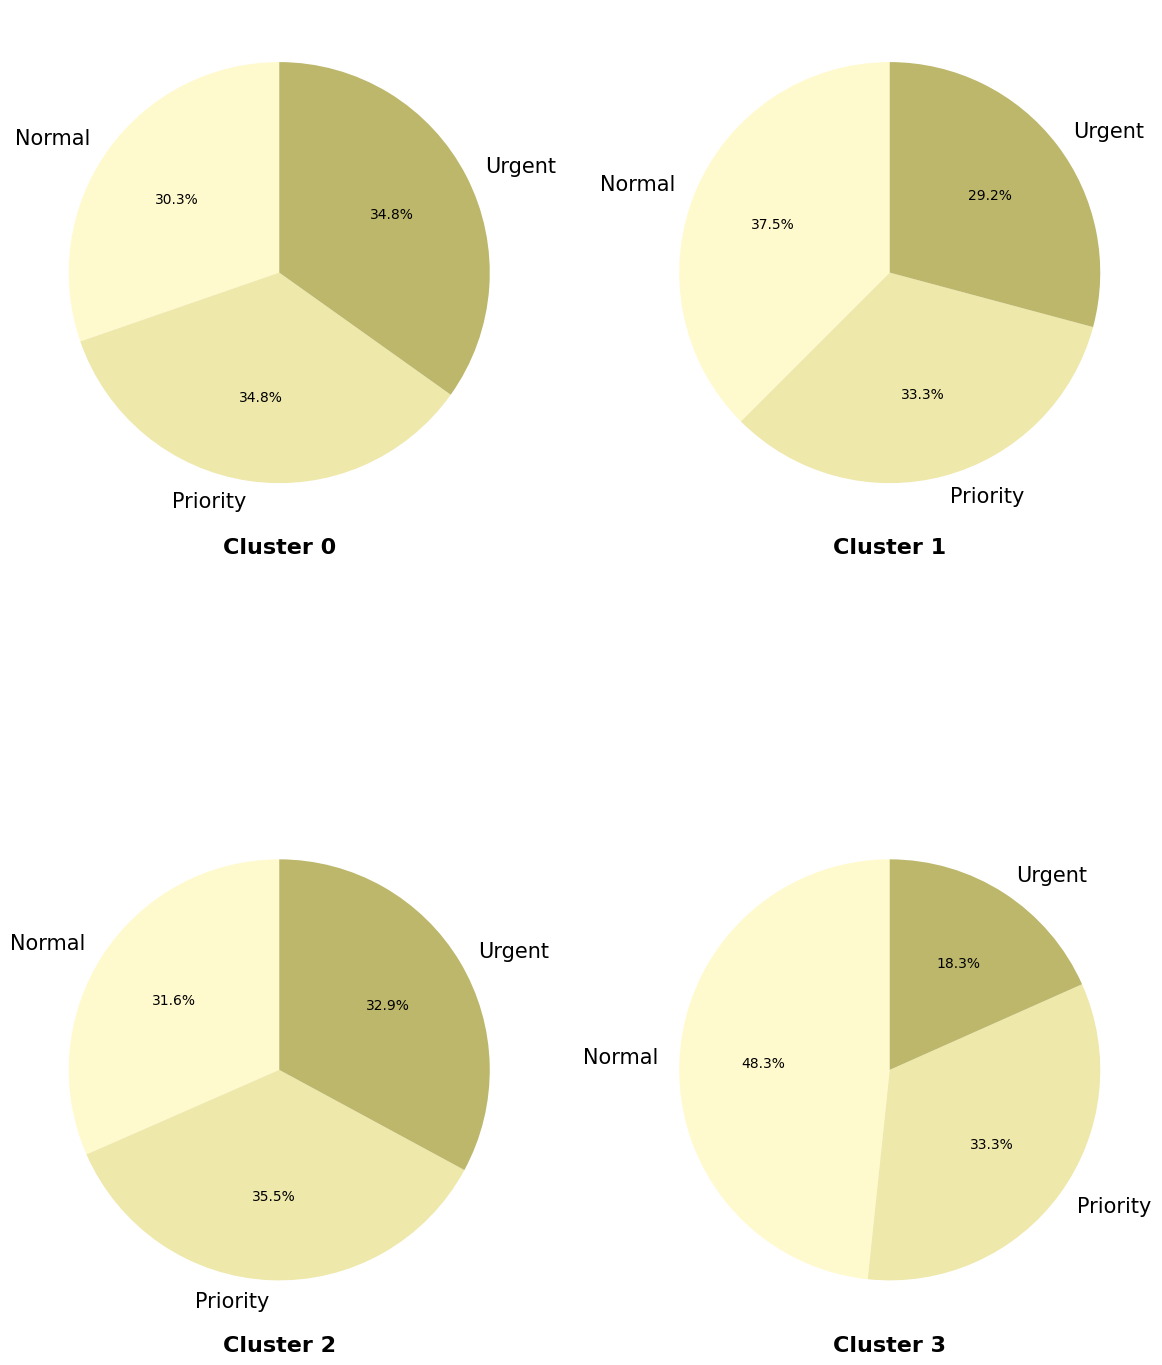

In [ ]:
totalPerCluster = dataPred[["cluster"]].value_counts()
totalGVsCount = 80
totalAVsCount = 20

remainingGVsCount = 80
remainingAVsCount = 20

totalTaskCount = 0
threshold = 0

for t in totalPerCluster: totalTaskCount += t

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 18))


## The following loop assignes delivery modes to tasks according to the defined worker type counts above
for c, ax in zip(range(4), axs.flat):
    print("Processing cluster: ", c)
    print("Total tasks per cluster ", totalPerCluster[c])

    totalClusterWeightPercent = totalPerCluster[c]/totalTaskCount
    print("Cluster task occupancy of the total task count ", totalClusterWeightPercent)

    cluster_c = dataPred.loc[dataPred['cluster'] == c]
    urgencyPerClusterCount = cluster_c.groupby("urgency").count()["cluster"] / totalPerCluster[c]

    AV, HV, GV = caculateNumberOfWorkers(totalPerCluster[c], totalGVsCount, totalAVsCount, totalClusterWeightPercent, urgencyPerClusterCount)
    remainingGVsCount -= GV
    remainingAVsCount -= AV

    # Normal tasks are served by GVs, while urgent tasks are served by AVs.
    dataPred.loc[dataPred["urgency"] == 60,"deliveryMode"] = "GV"
    dataPred.loc[dataPred["urgency"] == 100,"deliveryMode"] = "AV"

    # For priority tasks, an optimization algorithm is used to specify the required number an type of workers based on
    # travelling distance and avaiable workers.
    priorityTasks_c = cluster_c.loc[cluster_c['urgency'] == 80]
    for i, task in priorityTasks_c.iterrows():
        mode = getDeliveryMode(task, remainingGVsCount, remainingAVsCount, urgencyPerClusterCount[80])
        dataPred["deliveryMode"][i] = mode
        if mode == 'AV':
            remainingAVsCount -= 1
            AV += 1
            HV -= 1
        else:
            remainingGVsCount -= 1
            GV += 1
            HV -= 1
    GV = GV + abs(HV)
    HV = 0
    print(f'AV count: {AV}, GV count: {GV}')
    print(f'Total workers assigned to cluster {c}: {AV + HV + GV}')
    #print(f'Total workers remaining: GVs: {remainingGVsCount}, AVs: {remainingAVsCount}')

    print("______________________________________________________________")
    labels = urgencyPerClusterCount.keys().map({60: "Normal",80: "Priority", 100: "Urgent"})
    texts, autotexts, wedges = ax.pie(urgencyPerClusterCount,
                                      labels=labels,
                                      shadow=False,
                                      startangle=90,
                                      textprops=dict(color="black"),
                                      autopct='%.1f%%',
                                      colors= ['lemonchiffon','palegoldenrod', 'darkkhaki'])
    plt.setp(autotexts, size=15)
    ax.set_title(f"Cluster {c}", size=16, weight="bold", y=-0.05)

plt.tight_layout()
dataPred.to_csv("/content/drive/MyDrive/tasksDeliveryMode.csv",columns = ['deliveryMode'])
print("END")


#Preparing Workers data

In [ ]:
# Read workers data of collaborative workforce work
#WorkersData = pd.read_csv('/content/drive/MyDrive/workers_dataset.csv')[0:100]

# Read  Workers Data of Ride Austin Dataset
WorkersData = pd.read_csv('/content/drive/MyDrive/RideAustin_Dataset.csv')
#print(WorkersData.shape)
TasksData = dataPred

c=182
# Get top active workers based on the defined c variable in the previous line
FilteredWorkers = WorkersData.loc[WorkersData['ID'].isin(WorkersData['ID'].value_counts()[:c].keys().tolist())]

xWorkers = np.array(FilteredWorkers.iloc[:,0:20])
yWorkers = np.array(FilteredWorkers.iloc[:,20])

#scale coordinates from old to new range to match tasks coordinates scale (15 km2)

OldRangeX = max(FilteredWorkers['start_long']) - min(FilteredWorkers['start_long'])
NewRangeX = max(TasksData['dropoff_x_loc']) - min(TasksData['dropoff_x_loc'])

OldRangeY = max(FilteredWorkers['start_lat']) - min(FilteredWorkers['start_lat'])
NewRangeY = max(TasksData['dropoff_y_loc']) - min(TasksData['dropoff_y_loc'])

ScaleFactorX = NewRangeX / OldRangeX
ScaleFactorY = NewRangeY / OldRangeY

#print(ScaleFactorX)
#print(ScaleFactorY)

## Scale X coordinates
FilteredWorkers['start_long'] = (((FilteredWorkers['start_long'] - min(FilteredWorkers['start_long'])) * ScaleFactorX) + min(TasksData['dropoff_x_loc']))

## Scale Y coordinates
FilteredWorkers['start_lat'] = (((FilteredWorkers['start_lat'] - min(FilteredWorkers['start_lat'])) * ScaleFactorY) + min(TasksData['dropoff_y_loc']))

#print(FilteredWorkers[['start_long', 'start_lat']])

FilteredWorkers.insert(0, "cluster", pd.DataFrame([None]*11192))


## The following code extracts the first occurance per worker to be added as the initial set of workers in the service area
FilteredWorkers['driverrating'].fillna(method='ffill', inplace=True)
groupedWorkersById = FilteredWorkers.groupby(by=['ID'])

## later on, add cluster to the group to be used for cluster
def getWorkersStartingPoints (groupedWorkers):
  coords = groupedWorkers[['start_long', 'start_lat','driverrating']].values
  return coords[0]

workersCoords = groupedWorkersById.apply(getWorkersStartingPoints).rename("workersCoords")
merged = FilteredWorkers.merge(workersCoords, on=['ID'])
workersStartingCoords = workersCoords.loc[merged['ID'].isin(merged['ID'].unique())]

workersStartingCoords = workersStartingCoords.copy()
workersStartingCoords.apply(np.random.permutation)

TasksData = dataPred

<ipython-input-15-d087e7e429cf>:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-15-d087e7e429cf>:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-15-d087e7e429cf>:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
## Construct double auction market

@dataclass
class Order(object):
    creatorID: int
    side: bool
    ETA: int
    rating: float
    urgency: int
    workerType: bool
    cluster: int
    pickupEstimation: int
    nextAvailability: float
    coords: int
    submissionTime: str
    price: int

    # Side: 0 for tasks, 1 for workers
    # workerType: 0 for GV, 1 for AV

@dataclass
class Match(object):
    Task: Order
    Worker: Order

In [ ]:
class Market(object):
    def __init__(self):
        self.Tasks: List[Order] = []
        self.Workers: List[Order] = []
        self.Matches: List[Match] = []
        self.LateMatches: List[Match] = []
        self.underratingMatches: List[Match] = []
        self.underbudgetMatches: List[Match] = []
        self.MatchedWorkers: List[Order] = []
        self.lateMatchesTimestamps: List[Match] = []
        self.wellMatchesTimestamps: List[Match] = []

        self.allocationRoundCounter: int = 0
        #self.clearanceRate = 0

    ## The following function updates worker information (next availability time, rating, coordinates, ..) each time after being assigned a task
    def updateWorker(self, currWorker: Order, currTask: Order, late: bool):
      updatedWorker = currWorker
      updatedWorker.coords = currTask.coords

      originPoint = np.array((updatedWorker.coords[0], updatedWorker.coords[1]))
      pickupPoint = np.array((7500,7500)) ## To be modified

      euc_distance_to_pickup= np.linalg.norm(pickupPoint - originPoint)
      avgSpeed = 1666.66667 if updatedWorker.workerType == 1 else 1166.66667

      updatedWorker.ETA = euc_distance_to_pickup / avgSpeed

      currRating = updatedWorker.rating
      newRating = currRating-1 if late else currRating+1
      newRating = 5 if newRating>5 else newRating
      updatedWorker.rating = newRating

      # worker ETA: origin to pickup, task ETA: pickup to dropoff
      taskCompletionTime = updatedWorker.ETA + currTask.ETA
      startTime = currWorker.nextAvailability if currWorker.nextAvailability > currTask.submissionTime else currTask.submissionTime
      updatedWorker.nextAvailability = str(datetime.strptime(startTime, '%Y-%m-%d %H:%M:%S.%f') + dt.timedelta(minutes=taskCompletionTime))
      return updatedWorker


#    def getDriversAnalysis (self, Matches):
#      AVsCount = 0 # Count of AVs that served GV-assigned Tasks
#      GVsCount = 0 # Count of GVs that served AV-assigned Tasks

      # If GVs Count exceeds AVs count then that mean cost is reduced even below the original expected cost,
      # as there are many GVs we able to satisfy AV-assigned tasks

#      for match in Matches:
#        if match.Task.workerType != match.Worker.workerType:
#          if match.Task.workerType == 0:
#            AVsCount += 1
#          else:
#            GVsCount += 1

#      return AVsCount, GVsCount

    ## The follwoing function adds workers/tasks into the market space
    def AddOrder(self, order: Order):
        if order.side:
            self.Workers.append(order)
        else:
            self.Tasks.append(order)

    ## The following function runs double-auction-based matching of tasks and available workers -- for benchmark (truthful online mobile crowdsourcing)
    def MatchOrdersBenchmark(self, threshold):

      tasks = sorted(self.Tasks, key=lambda t: (t.submissionTime)).copy()
      workers = sorted(self.Workers, key=lambda w: (w.nextAvailability), reverse = True).copy()
      #print(f"total workers: {len(workers)}")

      self.Matches = []
      self.MatchedWorkers = []
      self.lateMatchesTimestamps = []
      self.wellMatchesTimestamps = []
      slotUtility = [0]*10

      self.winningTasks = []
      self.winningWorkers = []
      self.failedTasks = []

      totalDistance = 0
      totalRidesTravellingDistance = 0
      revenue = 0
      totalExpenses = 0
      count = 0

      t = 0
      clearingPrice = 0
      rTheta = 0
      wTheta = float('inf')
      rLambda = 1
      wLambda = 1
      priceList = [None, None]
      validProfit = 0
      penalizedProfit = 0
      latency = 0
      lateCount = 0
      alpha = -0.05 ## delay penalty coefficient

      qoa = 0
      QoA = 0
      normalizedQoA = 0

      while t == 0:

        # Get current slot tasks and workers
        slotTasks = self.Tasks[t*100:(t+1)*100]
        slotWorkers = workers # we assume all workers bid for all tasks.

        while len(slotTasks):

          currTask = slotTasks.pop(0)
          late = 0
          ratingFlag = 0
          budgetFlag = 0
          latencyTime = 0
          taskTimeFrame = 0

          pickupPoint = np.array((7500,7500))
          dropoffPoint = np.array((currTask.coords[0], currTask.coords[1]))

          # Get a list of available workers -- here we consider them as the workers who bid on the current task
          availableWorkers =  [w for w in slotWorkers if w.nextAvailability <= currTask.submissionTime]
          availableWorkers =  random.sample(availableWorkers, random.randint(10,len(availableWorkers))) if len(availableWorkers)>10 else availableWorkers

          self.winningWorkers = []
          sortedWorkerBids = sorted(availableWorkers, key=lambda w: (w.price))
          for worker in sortedWorkerBids:
            if worker.price <= currTask.price:
              self.winningWorkers.append(worker)

          if (len(self.winningWorkers) == 0):
            self.failedTasks.append(currTask)
            #slotTasks.append(task) ## return back to list of tasks to be fulfilled in next slots.
          else:
            currWorker = sorted(self.winningWorkers, key=lambda w: (w.price)).pop(0)

            workers = [w for w in workers if w.creatorID != currWorker.creatorID]

            originPoint = np.array((currWorker.coords[0], currWorker.coords[1]))

            dropoffDistance = np.linalg.norm(pickupPoint - dropoffPoint)
            pickupDistance = np.linalg.norm(pickupPoint - originPoint)

            totalDistance = pickupDistance + dropoffDistance
            totalRidesTravellingDistance += totalDistance
            workerTimeToDropoff = dropoffDistance/ (1166.66667 if currWorker.workerType == 0 else 1666.66667)

            taskTimeLimit = datetime.strptime(currTask.submissionTime, '%Y-%m-%d %H:%M:%S.%f') + dt.timedelta(minutes=currTask.pickupEstimation + currTask.ETA)
            workerTimeLimit = datetime.strptime(currTask.submissionTime if currTask.submissionTime > currWorker.nextAvailability else currWorker.nextAvailability, '%Y-%m-%d %H:%M:%S.%f') + dt.timedelta(minutes=currWorker.ETA + workerTimeToDropoff)

            clearingRate = self.ComputeClearingRate()

            if clearingRate > currWorker.rating:
              self.underratingMatches.append(Match(currTask, currWorker))

            late = 0
            lateTime = 0

            updatedWorker = self.updateWorker(currWorker, currTask, late)

            self.MatchedWorkers.append(updatedWorker)
            self.Matches.append(Match(currTask, currWorker))

            rTheta = currTask.price
            wTheta = currWorker.price
            priceList = [rTheta, wTheta]

            taskTimeFrame = (taskTimeLimit - datetime.strptime(currTask.submissionTime, '%Y-%m-%d %H:%M:%S.%f')).total_seconds()/60

            if (taskTimeLimit-workerTimeLimit).total_seconds()/60 > threshold:
                allocationFlag = 1
                lPercent = 1
                sPercent = 1

                validProfit = (currTask.price - currWorker.price)
                if (validProfit<0 and (-validProfit < penalizedProfit)):
                  self.underbudgetMatches.append(Match(currTask, currWorker))

                  if (taskTimeLimit-workerTimeLimit).total_seconds()/60 < 0:
                    self.lateMatchesTimestamps.append(Match(taskTimeLimit, workerTimeLimit))
                    self.LateMatches.append(Match(currWorker, currTask))
                    latencyTime = (taskTimeLimit-workerTimeLimit).total_seconds()/60
                    latency += latencyTime

                    if (validProfit < 0):
                      print(abs(validProfit))

                    pProfit = validProfit - (alpha*latencyTime*abs(validProfit))
                    penalizedProfit += pProfit
                    lateCount +=1
                    slotUtility[t] += pProfit  ## update slot utility
                    late = 1
                    lPercent = ((taskTimeFrame+latencyTime)/taskTimeFrame)
                    qoa = (allocationFlag * pProfit * lPercent) / ((1 + ratingFlag + budgetFlag))
                  else:
                    speedup = (taskTimeLimit-workerTimeLimit).total_seconds()/60
                    self.wellMatchesTimestamps.append(Match(taskTimeLimit, workerTimeLimit))
                    sPercent = ((taskTimeFrame+speedup)/taskTimeFrame)
                    penalizedProfit += validProfit
                    qoa = (allocationFlag * validProfit * sPercent) / ((1 + ratingFlag + budgetFlag))
                else:
                  qoa = 0
                  self.failedTasks.append(currTask)
            else:
              qoa = 0
              self.failedTasks.append(currTask)
              taskTimeLimit = datetime.strptime(currTask.submissionTime, '%Y-%m-%d %H:%M:%S.%f') + dt.timedelta(minutes=currTask.pickupEstimation + currTask.ETA)

              self.tasksTimeLimitsInMinutes.append([currTask.creatorID, (taskTimeLimit-startingTime).total_seconds()/60])
              self.resultsTaskTimeLimitsInMinutes.append([currTask.creatorID, -1])

            if (qoa > maxQoA):
              maxQoA = qoa
            if (qoa < minQoA):
              minQoA = qoa

            QoA += qoa

        workers = sorted(self.MatchedWorkers+workers, key=lambda w: (w.nextAvailability), reverse = True)
        newCoordsDistribution = pd.DataFrame({'start_long': [w.coords[0] for w in workers], 'start_lat': [w.coords[1] for w in workers]})
        self.MatchedWorkers = []

        t = t + 1

      while t < 10:
        #print(f"This is slot: {t}")
        self.winningTasks = []
        ob = 0

        # Get current slot tasks and workers
        slotTasks = self.Tasks[t*100:(t+1)*100] + slotTasks

        slotUtility[t] = slotUtility[t-1]

        while len(slotTasks):

          self.winningWorkers = []

          currTask = slotTasks.pop(0)
          late = 0
          ratingFlag = 0
          budgetFlag = 0
          latencyTime = 0
          taskTimeFrame = 0
          #print(currTask.price)
          ################################### WINNER SELECTION ALGORITHM ##################################
          if currTask.price >= 0: #priceList[0]:
            self.winningTasks.append(currTask)

            pickupPoint = np.array((7500,7500))
            dropoffPoint = np.array((currTask.coords[0], currTask.coords[1]))

            # Get a list of available workers
            availableWorkers =  [w for w in workers if w.nextAvailability <= currTask.submissionTime]
            availableWorkers =  random.sample(availableWorkers, random.randint(10,20)) if len(availableWorkers)>= 20 else availableWorkers
            # Instead of having a loop over all winning workers and getting the min, in our case we only have one worker per task,
            # we directly select the worker with the least bidding price
            # we have one requester per task
            # we assume all workers submit one bid for each task.
            sortedWorkerBids = sorted(availableWorkers, key=lambda w: (w.price))

            if (len(sortedWorkerBids) == 0):
              self.failedTasks.append(currTask)
              #slotTasks.append(task) ## return back to list of tasks to be fulfilled in next slots.
            else:
              #print(f"Previous worker price: {priceList[1]}")
              #print(f"current worker price: {sortedWorkerBids[0].price}")
              #print(f"Previous slot utility: {slotUtility[t]}")

              if priceList[1] <= slotUtility[t]: #and sortedWorkerBids[0].price <= priceList[1]:
                currWorker = sortedWorkerBids.pop(0)
                self.winningWorkers.append(currWorker)

                workers = [w for w in workers if w.creatorID != currWorker.creatorID]

                originPoint = np.array((currWorker.coords[0], currWorker.coords[1]))

                dropoffDistance = np.linalg.norm(pickupPoint - dropoffPoint)
                pickupDistance = np.linalg.norm(pickupPoint - originPoint)

                totalDistance = pickupDistance + dropoffDistance
                totalRidesTravellingDistance += totalDistance
                workerTimeToDropoff = dropoffDistance/ (1166.66667 if currWorker.workerType == 0 else 1666.66667)

                taskTimeLimit = datetime.strptime(currTask.submissionTime, '%Y-%m-%d %H:%M:%S.%f') + dt.timedelta(minutes=currTask.pickupEstimation + currTask.ETA)
                workerTimeLimit = datetime.strptime(currTask.submissionTime if currTask.submissionTime > currWorker.nextAvailability else currWorker.nextAvailability, '%Y-%m-%d %H:%M:%S.%f') + dt.timedelta(minutes=currWorker.ETA + workerTimeToDropoff)

                clearingRate = self.ComputeClearingRate()

                if clearingRate > currWorker.rating:
                  self.underratingMatches.append(Match(currTask, currWorker))

                late = 0
                lateTime = 0

                updatedWorker = self.updateWorker(currWorker, currTask, late)
                self.MatchedWorkers.append(updatedWorker)
                self.Matches.append(Match(currTask, currWorker))

                count += 1
                ################################### PRICING & THERSHOLD UPDATING ############################################
                rTheta = currTask.price
                wTheta = currWorker.price

                priceList = [rTheta, wTheta]
                p = (priceList[0] - priceList[1])
                #slotUtility[t] += p ## update platform utility
                taskTimeFrame = (taskTimeLimit - datetime.strptime(currTask.submissionTime, '%Y-%m-%d %H:%M:%S.%f')).total_seconds()/60

                if (taskTimeLimit-workerTimeLimit).total_seconds()/60 > threshold:
                  allocationFlag = 1
                  lPercent = 1
                  sPercent = 1

                  validProfit = p
                  if (validProfit<0 and (-validProfit < penalizedProfit)):
                    self.underbudgetMatches.append(Match(currTask, currWorker))

                    if (taskTimeLimit-workerTimeLimit).total_seconds()/60 < 0:
                      self.lateMatchesTimestamps.append(Match(taskTimeLimit, workerTimeLimit))
                      self.LateMatches.append(Match(currWorker, currTask))
                      latencyTime = (taskTimeLimit-workerTimeLimit).total_seconds()/60
                      latency += latencyTime

                      if (validProfit < 0):
                        print(abs(validProfit))

                      pProfit = validProfit - (alpha*latencyTime*abs(validProfit))
                      penalizedProfit += pProfit
                      lateCount +=1
                      slotUtility[t] += pProfit  ## update slot utility
                      late = 1
                      lPercent = ((taskTimeFrame+latencyTime)/taskTimeFrame)
                      qoa = (allocationFlag * pProfit * lPercent) / ((1 + ratingFlag + budgetFlag))
                    else:
                      speedup = (taskTimeLimit-workerTimeLimit).total_seconds()/60
                      self.wellMatchesTimestamps.append(Match(taskTimeLimit, workerTimeLimit))
                      sPercent = ((taskTimeFrame+speedup)/taskTimeFrame)
                      penalizedProfit += validProfit
                      qoa = (allocationFlag * validProfit * sPercent) / ((1 + ratingFlag + budgetFlag))
                  else:
                    qoa = 0
                    self.failedTasks.append(currTask)
              else:
                qoa = 0
                self.failedTasks.append(currTask)
                taskTimeLimit = datetime.strptime(currTask.submissionTime, '%Y-%m-%d %H:%M:%S.%f') + dt.timedelta(minutes=currTask.pickupEstimation + currTask.ETA)

                self.tasksTimeLimitsInMinutes.append([currTask.creatorID, (taskTimeLimit-startingTime).total_seconds()/60])
                self.resultsTaskTimeLimitsInMinutes.append([currTask.creatorID, -1])
          else:
              qoa = 0
              self.failedTasks.append(currTask)

        ## We only have one requester for the task, so there are no multiple requester's bid to sum
        workers = sorted(self.MatchedWorkers+workers, key=lambda w: (w.nextAvailability), reverse = True)
        newCoordsDistribution = pd.DataFrame({'start_long': [w.coords[0] for w in workers], 'start_lat': [w.coords[1] for w in workers]})
        self.MatchedWorkers = []

        t = t + 1

        speedup = self.getAvgTime(self.wellMatchesTimestamps)
        overBudget = len(self.underbudgetMatches)
        underRating = len(self.underratingMatches)
        allocation = len(self.wellMatchesTimestamps)

        if (qoa > maxQoA):
          maxQoA = qoa
        if (qoa < minQoA):
          minQoA = qoa

        QoA += qoa

      QoA /= 1000

      if(lateCount):
        return allocation, speedup, overBudget, underRating, validProfit, penalizedProfit, latency/lateCount, lateCount, QoA, maxQoA, minQoA
      else:
        return allocation, speedup, overBudget, underRating, validProfit, penalizedProfit, 0, 0, QoA, maxQoA, minQoA


    def MatchOrders(self, threshold):
        self.Tasks = sorted(self.Tasks, key=lambda t: (t.submissionTime))
        self.Workers = sorted(self.Workers, key=lambda w: (w.nextAvailability), reverse = True)
        self.MatchedWorkers = []
        self.lateMatchesTimestamps = []
        self.wellMatchesTimestamps = []
        self.tasksTimeLimitsInMinutes = []
        self.resultsTaskTimeLimitsInMinutes = []
        self.failedTasks = []

        startingTime = datetime.strptime(self.Tasks[0].submissionTime, '%Y-%m-%d %H:%M:%S.%f') - dt.timedelta(minutes = 1)
        totalRidesTravellingDistance = 0
        revenue = 0
        totalExpenses = 0
        altCount = 0
        validProfit = 0
        penalizedProfit = 0
        latency = 0
        lateCount = 0
        alpha = -0.05 ## delay penalty coefficient
        qoa = 0
        QoA = 0
        normalizedQoA = 0

        #print(f"Time between first and last task submitted {(datetime.strptime(self.Tasks[-1].submissionTime, '%Y-%m-%d %H:%M:%S.%f') - datetime.strptime(self.Tasks[0].submissionTime, '%Y-%m-%d %H:%M:%S.%f')).total_seconds()/60}")
        newCoordsDistribution = pd.DataFrame({'start_long': [w.coords[0] for w in self.Workers], 'start_lat': [w.coords[1] for w in self.Workers]})

        maxQoA = -1000
        minQoA = 1000
        while (len(self.Tasks) > 0 and len(self.Workers) > 0):
            currTask = self.Tasks.pop(0)
            late = 0
            ratingFlag = 0
            budgetFlag = 0
            latencyTime = 0
            taskTimeFrame = 0
            clearingRate = self.ComputeClearingRate()
            pricesList = self.ComputeClearingPrice()

            pickupPoint = np.array((7500,7500))
            dropoffPoint = np.array((currTask.coords[0], currTask.coords[1]))

            # Get a list of available workers
            availableWorkers = [w for w in self.Workers if (w.price<=pricesList[0] and w.workerType == 0) or (w.price<=pricesList[1] and w.workerType == 1)]
            availableWorkers =  sorted([w for w in availableWorkers if w.nextAvailability <= currTask.submissionTime], key=lambda w: ((np.linalg.norm(pickupPoint-np.array((w.coords[0], w.coords[1])))),w.price, -w.rating))

            currWorker = availableWorkers.pop(0) if len(availableWorkers) else self.Workers.pop(0)
            self.Workers = [w for w in self.Workers if w.creatorID != currWorker.creatorID]
            originPoint = np.array((currWorker.coords[0], currWorker.coords[1]))

            clearingPrice = pricesList[0] if currWorker.workerType == 0 else pricesList[1]

            dropoffDistance = np.linalg.norm(pickupPoint - dropoffPoint)
            pickupDistance = np.linalg.norm(pickupPoint - originPoint)

            totalDistance = pickupDistance + dropoffDistance
            totalRidesTravellingDistance += totalDistance
            workerTimeToDropoff = dropoffDistance/ (1166.66667 if currWorker.workerType == 0 else 1666.66667)

            taskTimeLimit = datetime.strptime(currTask.submissionTime, '%Y-%m-%d %H:%M:%S.%f') + dt.timedelta(minutes=currTask.pickupEstimation + currTask.ETA)
            workerTimeLimit = datetime.strptime(currTask.submissionTime if currTask.submissionTime > currWorker.nextAvailability else currWorker.nextAvailability, '%Y-%m-%d %H:%M:%S.%f') + dt.timedelta(minutes=currWorker.ETA + workerTimeToDropoff)

            self.tasksTimeLimitsInMinutes.append([currTask.creatorID, (taskTimeLimit-startingTime).total_seconds()/60])
            self.resultsTaskTimeLimitsInMinutes.append([currTask.creatorID, (workerTimeLimit-startingTime).total_seconds()/60])
            if clearingRate > currWorker.rating:
              self.underratingMatches.append(Match(currTask, currWorker))
              ratingFlag = 1

            #expense = currWorker.price*totalDistance - clearingPrice*totalDistance
            expense = currWorker.price - clearingPrice

            if expense > 0:
              if (expense < revenue):
                revenue -= expense
                #self.underbudgetMatches.append(Match(currTask, currWorker))
              else:
                #self.underbudgetMatches.append(Match(currTask, currWorker))
                totalExpenses += expense
                budgetFlag = 1
            else:
              revenue += (clearingPrice - currWorker.price)

            updatedWorker = self.updateWorker(currWorker, currTask, late)

            self.MatchedWorkers.append(updatedWorker)
            self.Matches.append(Match(currTask, currWorker))

            allocationFlag = 0
            # Update workers availability for next round of selection
            if (len(self.Workers)==0):
              #print(" _____________________________________ NEW ALLOCATION ROUND ______________________________________________")
              self.allocationRoundCounter = self.allocationRoundCounter + 1
              self.Workers = sorted(self.MatchedWorkers, key=lambda w: (w.nextAvailability), reverse = True)

              newCoordsDistribution = pd.DataFrame({'start_long': [w.coords[0] for w in self.Workers], 'start_lat': [w.coords[1] for w in self.Workers]})
              self.MatchedWorkers = []

            taskTimeFrame = (taskTimeLimit - datetime.strptime(currTask.submissionTime, '%Y-%m-%d %H:%M:%S.%f')).total_seconds()/60

            if (validProfit<0 and -validProfit < penalizedProfit):
              self.underbudgetMatches.append(Match(currTask, currWorker))

              if (taskTimeLimit-workerTimeLimit).total_seconds()/60 > threshold:
                  allocationFlag = 1
                  lPercent = 1
                  sPercent = 1
                  validProfit = (currTask.price - currWorker.price)
                  if (taskTimeLimit-workerTimeLimit).total_seconds()/60 < 0:
                    self.lateMatchesTimestamps.append(Match(taskTimeLimit, workerTimeLimit))
                    self.LateMatches.append(Match(currWorker, currTask))

                    latencyTime = (taskTimeLimit-workerTimeLimit).total_seconds()/60
                    latency += latencyTime
                    pProfit = validProfit - (alpha*latencyTime*abs(validProfit))
                    penalizedProfit += pProfit
                    lateCount +=1
                    late = 1
                    lPercent = ((taskTimeFrame+latencyTime)/taskTimeFrame)
                    qoa = (allocationFlag * pProfit * lPercent) / ((1 + ratingFlag + budgetFlag))

                  else:
                    speedup = (taskTimeLimit-workerTimeLimit).total_seconds()/60
                    self.wellMatchesTimestamps.append(Match(taskTimeLimit, workerTimeLimit))
                    sPercent = ((taskTimeFrame+speedup)/taskTimeFrame)
                    penalizedProfit += validProfit
                    qoa = (allocationFlag * validProfit * sPercent) / ((1 + ratingFlag + budgetFlag))
              else:
                  qoa = 0
                  taskTimeLimit = datetime.strptime(currTask.submissionTime, '%Y-%m-%d %H:%M:%S.%f') + dt.timedelta(minutes=currTask.pickupEstimation + currTask.ETA)

                  self.tasksTimeLimitsInMinutes.append([currTask.creatorID, (taskTimeLimit-startingTime).total_seconds()/60])
                  self.resultsTaskTimeLimitsInMinutes.append([currTask.creatorID, -1])

                  self.failedTasks.append(currTask)
            else:
                  qoa = 0
                  self.failedTasks.append(currTask)


            if (qoa > maxQoA):
              maxQoA = qoa
            if (qoa < minQoA):
              minQoA = qoa

            QoA += qoa

        QoA /= 1000
        speedup = self.getAvgTime(self.wellMatchesTimestamps)
        overBudget = len(self.underbudgetMatches)
        underRating = len(self.underratingMatches)
        allocation = len(self.wellMatchesTimestamps)

        if(lateCount):
          return allocation, speedup, overBudget, underRating, validProfit, penalizedProfit, latency/lateCount, lateCount, QoA, maxQoA, minQoA
        else:
          return allocation, speedup, overBudget, underRating, validProfit, penalizedProfit, 0, 0, QoA, maxQoA, minQoA

    ## The following function computes current clearance worker rating based on history of all task-worker matches in the market
    ## The clearance rate is used in the matching algorithm to make sure the selecter worker has a rating above the minimum accepted rating of the market.
    def ComputeClearingRate(self):
        if len(self.Matches) == 0:
            return 0

        clearingRate = 0
        cumulativeRating = 0
        for match in self.Matches:
          # Multiply by 5 to convert the rating scale from 0-1 to 0-5
          clearingRate += (match.Worker.rating + match.Task.rating*5)/2

        return clearingRate/len(self.Matches)

    ## The following function computes current clearance price based on history of all task-worker matches in the market
    ## The clearance price is used in the matching algorithm to make sure the selecter worker has a rating above the minimum accepted price of the market.
    ## There are 2 independent clearance prices, one for AVs and another for GVs.
    def ComputeClearingPrice(self) -> list:
        if len(self.Matches) == 0:
            return [100,100]

        matchedAVs = [m for m in self.Matches if m.Worker.workerType==1]
        matchedGVs = [m for m in self.Matches if m.Worker.workerType==0]

        clearingPrice = 0
        cumulativePrice = 0
        for match in matchedAVs:
            clearingPrice += (match.Worker.price + match.Task.price)/2
        clearingPriceOfAVs = clearingPrice/len(matchedAVs) if len(matchedAVs) else 0

        clearingPrice = 0
        cumulativePrice = 0
        for match in matchedGVs:
            clearingPrice += (match.Worker.price + match.Task.price)/2
        clearingPriceOfGVs = clearingPrice/len(matchedGVs)  if len(matchedGVs) else 0

        return [clearingPriceOfGVs, clearingPriceOfAVs]

    ## The following function returns the average latency time of all completed tasks in minutes
    def getAvgTime(self, timestamps):
      if len(timestamps) == 0:
        return 0

      latency = 0
      for match in timestamps:
        latency += ((match.Worker - match.Task).total_seconds()/60)

      return latency/len(timestamps)

In [ ]:
def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

In [ ]:
## SETUP:: HERE we define parameters of the simulation

threshold = -1000          ## delay threshold, whenever a task delay exceeds the set threshold, it fails
workers = 182              ## total number of workers in the platform
GVsCount = 0.8 * workers   ## percent of workers considered GVs
AVsCount = 0.2 * workers   ## percent of workeres considere AVs
iterations = 50            ## no. of simulations to be averaged for the final results


In [ ]:
# Create market instance and test orders

TasksData = dataPred

avg_AV_speed = 1666.66667 ## meter/min == 100 km/hour
avg_GV_speed = 1166.66667 ## meter/min == 70km/hour

## Generate normally distributed list of bid prices for both tasks and workers of each type
tGVPriceList = get_truncated_normal(40, 1, 30, 50).rvs(1000)
tAVPriceList = get_truncated_normal(60, 1, 50, 70).rvs(1000)
wGVPriceList = get_truncated_normal(20, 1, 10, 30).rvs(200)
wAVPriceList = get_truncated_normal(40, 1, 30, 50).rvs(200)

tasksPrices = []
workersPrices = []

countGV = 0
countAV = 0

tCount = 0
initialAvailability = 0
totalProfit = 0
totalLatency = 0
totalValidProfit = 0
totalQoA = 0

totalAllocation = 0
totalSpeedup = 0
totalOverBudget = 0
totalUnderRating = 0
totalLateCount = 0


for k in range(iterations):
  maxQoA = -1000
  minQoA = 1000

  #shuffle locations of tasks and workers
  TasksData['dropoff_x_loc'] = TasksData['dropoff_y_loc'].sample(frac=1).reset_index(drop=True)
  TasksData['dropoff_y_loc'] = TasksData['dropoff_x_loc'].sample(frac=1).reset_index(drop=True)

  workerStartingCoords = pd.DataFrame(workersStartingCoords)

  profit = 0
  latency = 0
  tCount = 0

  market = Market()

  ## the following loop adds tasks of each type into the markets based on their delivery modes
  for i, t in TasksData.iterrows():
    if tCount == 0:
      initialAvailability = datetime.strptime(t['submission_timestamp'], '%Y-%m-%d %H:%M:%S.%f') - dt.timedelta(minutes = 0.01)

    taskCoords = [t["dropoff_x_loc"], t["dropoff_y_loc"]]

    if t["deliveryMode"]=="GV":
      countGV += 1
      task = Order(creatorID=i, rating=t["min_Rep"], side=0, pickupEstimation=random.randint(10,30), ETA=t["ETA_GV"], urgency = t['urgency'], workerType=0, cluster=t["cluster"], nextAvailability=0, coords=taskCoords, price = tGVPriceList[tCount], submissionTime=t["submission_timestamp"])
      tasksPrices.append(tGVPriceList[tCount])
    else:
      countAV += 1
      task = Order(creatorID=i, rating=t["min_Rep"], side=0, pickupEstimation=random.randint(5,15), ETA=t["ETA_AV"], urgency = t['urgency'], workerType=1, cluster=t["cluster"], nextAvailability=0, coords=taskCoords, price = tAVPriceList[tCount], submissionTime=t["submission_timestamp"])
      tasksPrices.append(tAVPriceList[tCount])

    tCount += 1
    market.AddOrder(task)

    ## END OF TASKS LOOP


  coords = [0,0,0]
  iterCounter = 0
  workerStartingCoords = pd.DataFrame(workersStartingCoords)

  ## the following loop adds workers of each type into the market based on their type and defined counts
  for i, coords in workersStartingCoords.items():

    originPoint = np.array((coords[0], coords[1]))
    pickupPoint = np.array((7500,7500)) ## To be modified

    euc_distance_to_pickup= np.linalg.norm(pickupPoint - originPoint) ## in meter ..

    if iterCounter<=int(GVsCount):
      ## Add GV record
      GV = Order(creatorID=i, rating=coords[2], side=1, coords=coords, ETA=euc_distance_to_pickup/avg_GV_speed, urgency=60, workerType=0, cluster=0, nextAvailability=str(initialAvailability), pickupEstimation=0, price=wGVPriceList[iterCounter], submissionTime='')
      market.AddOrder(GV)
      workersPrices.append(wGVPriceList[iterCounter])
    else:
      # Add AV record
      AV = Order(creatorID=i, rating=coords[2], side=1, coords=coords, ETA=euc_distance_to_pickup/avg_AV_speed, urgency=100, workerType=1, cluster=0, nextAvailability=str(initialAvailability), pickupEstimation=0, price=wAVPriceList[iterCounter-int(GVsCount)], submissionTime='')
      market.AddOrder(AV)
      workersPrices.append(wAVPriceList[iterCounter-int(GVsCount)])
    iterCounter += 1

    ## END OF WORKERS LOOP


  ## Uncomment the target line to run simulations using the truthful auction benchmark work(1st line) or the proposed work (2nd line), do not uncomment both
  #allocation, speedup, overBudget, underRating, profit, penalizedProfit, latency, lateCount, QoA, maxqoa, minqoa = market.MatchOrdersBenchmark(threshold)
  allocation, speedup, overBudget, underRating, profit, penalizedProfit, latency, lateCount, QoA, maxqoa, minqoa = market.MatchOrders(threshold)
  #print(f"Profit of {k}: {profit}")

  if maxqoa>maxQoA:
    maxQoA = maxqoa

  if minqoa<minQoA:
    minQoA = minqoa

  totalProfit += profit
  totalValidProfit += penalizedProfit
  totalLatency += latency
  totalAllocation += allocation
  totalSpeedup += speedup
  totalOverBudget += overBudget
  totalUnderRating += underRating
  totalLateCount += lateCount
  totalQoA += QoA

totalProfit/=iterations
totalValidProfit/=iterations
totalLatency/=iterations
totalAllocation/=iterations
totalSpeedup/=iterations
totalOverBudget/=iterations
totalUnderRating/=iterations
totalLateCount/=iterations
totalQoA/=iterations

print(f"Total QoA: {totalQoA}")
print(f"Max QoA: {maxQoA}")
print(f"Min QoA: {minQoA}")
print(f"Scaled QoA: {((totalQoA-minQoA)/(maxQoA-minQoA))}")

print(f"Total alloaction: {totalAllocation}")
print(f"Total speedup: {totalSpeedup}")
print(f"Total latency: {totalLatency}")
print(f"Total late count: {totalLateCount}")

print(f"Total overbudget: {totalOverBudget}")
print(f"Total underRating: {totalUnderRating}")
print(f"Total Valid Profit: {totalValidProfit}")

